<a href="https://colab.research.google.com/github/abdusamaraie/MenuProject/blob/master/Samaraie_Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="center" class="full-width" src="http://jor.dance/images/work/instacart-logo-animated.gif" alt="Logo animated banner image" width="100%" height="40%" >

<h1 align="center" ><span style="color: #e86e17">Instacart</span> Market <span style="color:#52c23d">Basket</span> Analysis 🛍</h1>

> Abdu Samaraie Final project Preview

> DSA501 Summer 2022

References: 
> Runestone Academy HTTLADS 

> Kaggle.com


# **Intro** 🛒

Using the power of Exploratory Data Analysis to squeeze every ounce of insight from the data and drive business growth.

Online orders made it easy to collect user data that we did not have access to before. Like who would of known what is the customer first instinct when buying from the store? But with online orders, we do now have this information in our hand.

<br>
<p align="justify">
Instacart is a grocery ordering and delivery app with over 500 Million products and 40000 stores serves across U.S. & Canada. Instacart provides a user experience where you will get product recommendation based on your previous orders.
</p>

> Back in 2017, the company announced its first public dataset release, which is anonymized and contains a sample of over 3 million grocery orders from more than 200,000 Instacart users.


<br>
The goal of this project is to find which products customer tend to buy first when they start a new order online? Does their orders consist mostly of vegan/vegitarian/health foods? Answering those questions will give us valiable insights on customer buying habits.


# READING THE DATA

Step 1: Download the data

The data for the final project can be obtained from Kaggle.

In [3]:
# #!pip install kaggle # <- This is only needed the first time, I believe

# # Install needed libraries
# import json

# # API credentials

# token={"username":"abdsamaraie","key":"41d53c6bff7df1289b719887505f5b34"}

# # Create a folder in your Google account using the unix command "mkdir"
# !mkdir ~/.kaggle

# # Place the API credentials in the right place
# with open('/root/.kaggle/kaggle.json','w') as file:
#   json.dump(token, file)

# # Change the permissions of the file kaggle.json
# !chmod 600 /root/.kaggle/kaggle.json 

# # Get a list of the datasets in kaggle with "instacart" in its name
# !kaggle datasets list -s instacart




In [4]:
# # Download the appropriate dataset and put it in the content folder
# !kaggle datasets download -d psparks/instacart-market-basket-analysis -p /content

In [5]:
# # # Decript (unzip) all the encrypted files (with the ending ".zip") 
# !unzip \*.zip

In [6]:
# Importing libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import plotly.offline as pyo
import plotly.graph_objs as go
import pandas as pd
import numpy as np


# To  displays frames side by side
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)
        
# Disable warnings 
import warnings
warnings.filterwarnings('ignore')


#EXPLORING THE INSTACART DATASET

Step 2: explore the datasets and features:
 * Create Pandas DataFrames for each dataset
 * Get a list of the features for each data set
 * Explain what each data set represents
 * Explain what each feature means


In [7]:
%%time
# Another method to read the data
url='http://136.183.139.117/dsa501data/DSA501/instacart/'

files=['aisles','departments','order_products__prior','order_products__train','orders','products']
for file in files:
  # Create a Pandas DataFrame for each dataset
  globals()[file]=pd.read_csv(url+file+'.csv')

CPU times: user 9.77 s, sys: 2.73 s, total: 12.5 s
Wall time: 34.7 s


In [8]:
display(files[0],files[1],files[2])

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [9]:
display(files[3],files[4],files[5])

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


## Explain what each data set represents
### Descriptions

**Aisles** = Aisle number with description of the aisles in the store

**Departments** = departments name in the store (description of items of the department

**order_products__prior** = what each customer bought previously

**order_products__train** = last thing each customer bought

**orders** = what each customer bought

**products** = all the products available in the store

aisles (features):

* aisle_id -  Primary key - Each number represents an aisle 
* aisle - The corresponding aisle name for each aisle_id

departments (features):

* department_id -  Primary key- Each number represents a department
* department - The corresponding department name for each department_id

order_products__prior (features):

* order_id -  Primary key - Each number represent the ID of an order
* product_id - Each number represents a product that is in stock
* add_to_cart_order - The order in which each item was added to the cart
* reordered - Whether or not the item was reordered. 0 = False and 1 True

order_products_train (features):

* order_id - Each number represent the ID of an order
* product_id - Each number represents a product that is in stock
* add_to_cart_order - The order in which each item was added to the cart
* reordered - Whether or not the item was reordered. 0 = False and 1 True

orders (features):

* order_id - Each number represent the ID of an order
* user_id - Each number represents the ID of a user that placed an order
* eval_set - Indicates whether the order placed was a prior order or a train(the last order placed for a user)
* order_number - The number of the order placed by a user
* order_dow - The day of the week the order was placed
* order_hour_of_day - The hour of the day the order was placed
* days_since_prior_order - Days since the last order was placed

products (features):

* product_id - Each number represents a product that is in stock
* product_name - The corresponding product name for each product_id
* aisle_id - Each number represents an aisle
* department_id - Each number represents a department

# QUESTIONING THE DATA

### 4D Framework
1. problem: What products customer tend to buy first when they start a new order online ? and Do their orders consist mostly of vegan/vegitarian/health foods?
2.  outcome: Find patterns based on the products ordered to understand the customer's needs and behaviors. Based on the product or multiple pruducts (top 3 product purchased first) Knowing which items are most frequently purchased is the first step for Instacart to optimize its software product and recommend items for customers while they shop. 
3. Action:  Explore and manipulate the data and mark the frequently purchased purchased pruduct as essintial items (the type of pruduct purchased will give us customer insite and purchase behaivor) to sell more of the item
4. Measure:  number of product sold. increase/decrease

### Q0: How many orders did user_id 1 have? and what are those orders?

In [10]:
orders.user_id.value_counts().loc[1]

11

In [11]:
orders[orders.user_id==1]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


### Q1: Are order_id unique in the data set orders.csv?

In [12]:
orders.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')

In [13]:
if len(orders) == len(orders.order_id.unique()):
  print("order id is unique")

order id is unique


Answer: each order appears only once. They are unique in that sense.

### Q2: Are user_id unique in orders.csv?

In [14]:
len(orders)==len(orders.user_id.unique())

False

### Q3: How many orders does each user have?

In [15]:
orders.user_id.value_counts()

152340    100
185641    100
185524    100
81678     100
70922     100
         ... 
13046       4
70208       4
111440      4
31762       4
47980       4
Name: user_id, Length: 206209, dtype: int64

### Q4: List of the features for each data set as visually clearly as possible.


In [16]:
f_dict={}
for file in files:
  f_dict[file]=[globals()[file].columns.values]
df=pd.DataFrame(f_dict).T
df

,0
aisles,"[aisle_id, aisle]"
departments,"[department_id, department]"
order_products__prior,"[order_id, product_id, add_to_cart_order, reor..."
order_products__train,"[order_id, product_id, add_to_cart_order, reor..."
orders,"[order_id, user_id, eval_set, order_number, or..."
products,"[product_id, product_name, aisle_id, departmen..."


In [17]:
pd. set_option('display.max_columns', None)
pd. set_option('display.max_colwidth', None)
df

,0
aisles,"[aisle_id, aisle]"
departments,"[department_id, department]"
order_products__prior,"[order_id, product_id, add_to_cart_order, reordered]"
order_products__train,"[order_id, product_id, add_to_cart_order, reordered]"
orders,"[order_id, user_id, eval_set, order_number, order_dow, order_hour_of_day, days_since_prior_order]"
products,"[product_id, product_name, aisle_id, department_id]"


### Q5: What did user_id 1 purchase on his/her last order (i.e. the "train" order)?

In [18]:
df5 = pd.merge(orders,order_products__train)[['user_id','order_id','product_id']]
df5

,user_id,order_id,product_id
0,1,1187899,196
1,1,1187899,25133
2,1,1187899,38928
3,1,1187899,26405
4,1,1187899,39657
...,...,...,...
1384612,206209,272231,40603
1384613,206209,272231,15655
1384614,206209,272231,42606
1384615,206209,272231,37966


In [19]:
df51 = df5[df5.order_id==1187899]
df51a = pd.merge(df51,products)[['user_id','product_name']]
df51a 

,user_id,product_name
0,1,Soda
1,1,Organic String Cheese
2,1,0% Greek Strained Yogurt
3,1,XL Pick-A-Size Paper Towel Rolls
4,1,Milk Chocolate Almonds
5,1,Pistachios
6,1,Cinnamon Toast Crunch
7,1,Aged White Cheddar Popcorn
8,1,Organic Whole Milk
9,1,Organic Half & Half


###Q6 What is the most frequent purchased product in prior?

In [20]:
ax=order_products__prior.product_id.value_counts()
ax.index

Int64Index([24852, 13176, 21137, 21903, 47209, 47766, 47626, 16797, 26209,
            27845,
            ...
             1002, 22747, 34331, 41967,  3117, 14756, 20264, 31254, 13397,
            23624],
           dtype='int64', length=49677)

In [21]:
products[products.product_id==24852]

,product_id,product_name,aisle_id,department_id
24851,24852,Banana,24,4


Answer: banana

Question: What is the most popular second item?

In [22]:
products[products.product_id==13176]

,product_id,product_name,aisle_id,department_id
13175,13176,Bag of Organic Bananas,24,4


## Q7  What is the most shopped departments?
- based on the number of items bought from each department

In [23]:
productOrdered = pd.merge(products,order_products__prior, on="product_id")
deptdf = pd.merge(departments,productOrdered, on='department_id')

In [24]:

df = deptdf.department.value_counts().sort_values(ascending=False).reset_index().rename(columns={'index': 'department', 'department':'count'} )
data = [go.Bar(
    x=df['department'],  
    y=df['count']
)]
layout = go.Layout(
    title='Most Shopped Departments by Product Purchased',
    yaxis_title = "Number of items bought", 
    xaxis_title = "Departments"

)
fig = go.Figure(data=data, layout=layout)
fig.update_xaxes(tickangle = 45)
fig.show()

### Q8: What department gets the most sales?

In [25]:
# produce from the chart above

### Q9: What is the number of items sold by day of the week.

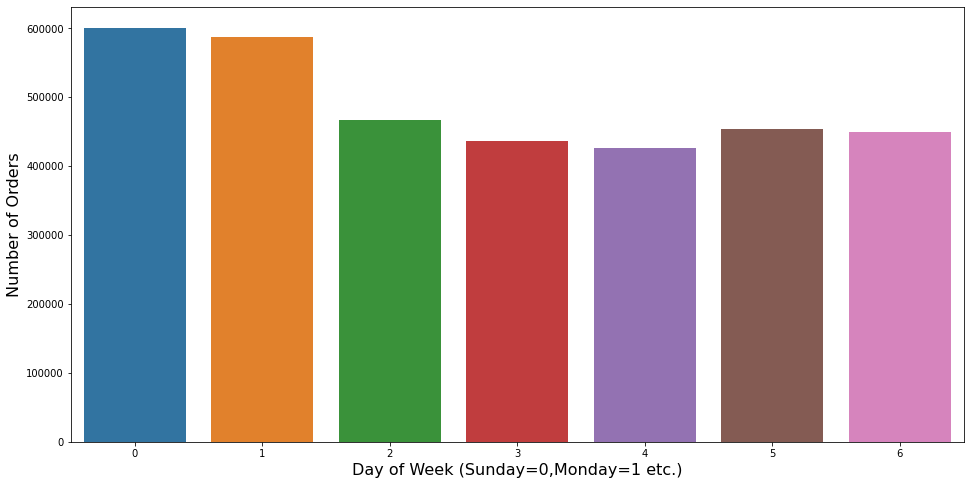

In [26]:
plt.figure(figsize=(16,8))
ax = sns.countplot(x='order_dow',data=orders)
plt.ylabel('Number of Orders', fontsize=16)
plt.xlabel('Day of Week (Sunday=0,Monday=1 etc.)', fontsize=16)
plt.show(ax)

## Answering Which product was purchased first most of the time by all customers?

---
<br>

> ## What can you understand from the customer first add to cart item?



<p align="left"> <img src="https://www.instacart.com/assets/creditcards/ic-card-paypal-login-a3b371cf53622bc5002fa426b21761ca35bfdef7a0e3347f0a0e850207b494cc.svg" align="right"> <br>Knowing which product graps the attintion of the customer first is really important. It can help us retarget the customer with a marketing campagin to recommend a similar products he is definitly intrested in. 
</p>

**Solution**: Products placed first in cart are the products mostly reordered. We can invest in this information and start recommeding product that are similar to the most reordered product. 

~~Note~~: This is called Cross-selling or up-selling in marketing terms.




In [27]:
# first compine order_product_train and prior
df1 = pd.concat([order_products__prior, order_products__train],                  # Append two pandas DataFrames
                      ignore_index = True,
                      sort = False)
# get only the products that has been added to cart first and was reordered
df2 = df1[(df1['add_to_cart_order'] == 1) & (df1['reordered'] == 1)]
# group it by the product that was frequently reordered the most
df3 = df2.groupby(['product_id'])['reordered'].agg(['sum'])
df4 = df3.merge(products, on='product_id').sort_values('sum',ascending=False)
df4 

,product_id,sum,product_name,aisle_id,department_id
16480,24852,102269,Banana,24,4
8624,13176,72651,Bag of Organic Bananas,24,4
18447,27845,27781,Organic Whole Milk,84,16
13961,21137,23022,Organic Strawberries,24,4
31424,47209,20389,Organic Hass Avocado,24,4
...,...,...,...,...,...
14612,22087,1,Whole Celery Seed,104,13
14611,22086,1,Fire Roasted Diced Tomatoes With Garlic,81,15
14610,22084,1,Chocolate Ice Cream in Wafer cups,37,1
7295,11113,1,9 Grain Bread,112,3


In [28]:
data = [go.Bar(
    x=df4['product_name'].head(20),  
    y=df4['sum']
)]
layout = go.Layout(
    title='Which product was purchased first most of the time by all customers',
    yaxis_title = "Number of reorders", 
    xaxis_title = "Product Name"

)
fig = go.Figure(data=data, layout=layout)
fig.update_xaxes(tickangle = 45)
fig.show()

## Purchasing behaviour on Departments and Aisles


In [29]:
colors = sns.color_palette("crest", 8)

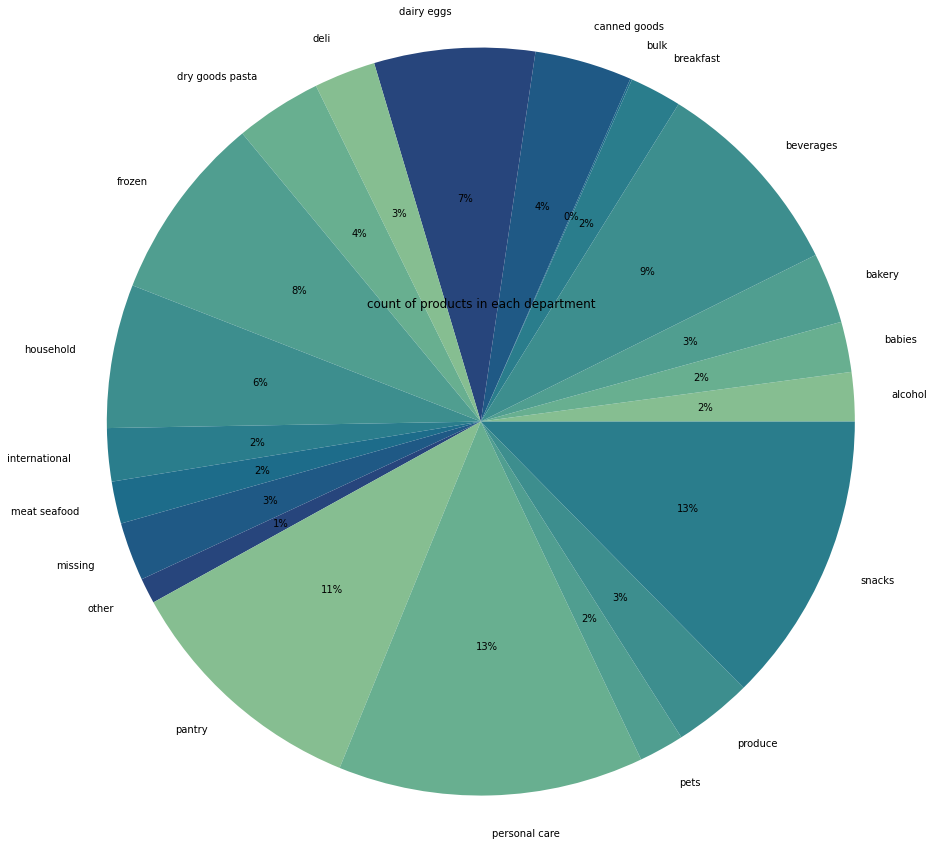

In [30]:
# count of products in each department

# merge products with departments
prod_dept = products.merge(departments, on='department_id', how='left')
data = prod_dept.groupby(['department']).agg({'product_id':'count'}).reset_index().rename(columns={'product_id':'products_count'})
plt.pie(data['products_count'], labels = data['department'], colors = colors, autopct='%.0f%%', radius=4.3)
plt.title('count of products in each department')
plt.show()

# Conclusion 💰

<p align="justify">Doing this Exploratory Data Analysis allows me to understand in precise details about the customer shopping behavior on the Instacart platform. Knowing which items are first purchased is the first step for Instacart to optimize its software product and recommend items for customers while they shop.</p>